In [1]:
# Importo le librerie
import requests
import pandas as pd
from serpapi import GoogleScholarSearch
import re
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import pickle
from pyvis.network import Network
import json

                       name  \
0          David La Barbera   
1           Michael Soprano   
2             Kevin Roitero   
3           Stefano Mizzaro   
4             Damiano Spina   
..                      ...   
129      Pavlos Vougiouklis   
130           Jonathon Hare   
131  Carlo Alberto Beltrami   
132           Richard Gomer   
133           Davide Ceolin   

                                          affiliations     author_id  \
0                      Università Degli Studi Di Udine  MvN8wKEAAAAJ   
1    Postdoctoral Research Fellow at the University...  ocK0qRUAAAAJ   
2                                  University of Udine  1xd52jMAAAAJ   
3    Full professor of Computer Science and Informa...  2wvJC6IAAAAJ   
4    School of Computing Technologies, RMIT University  sLzYrNYAAAAJ   
..                                                 ...           ...   
129                                Huawei Technologies  9J7YeR0AAAAJ   
130  NOAA Fisheries, Northeast Fisheries Science Ce

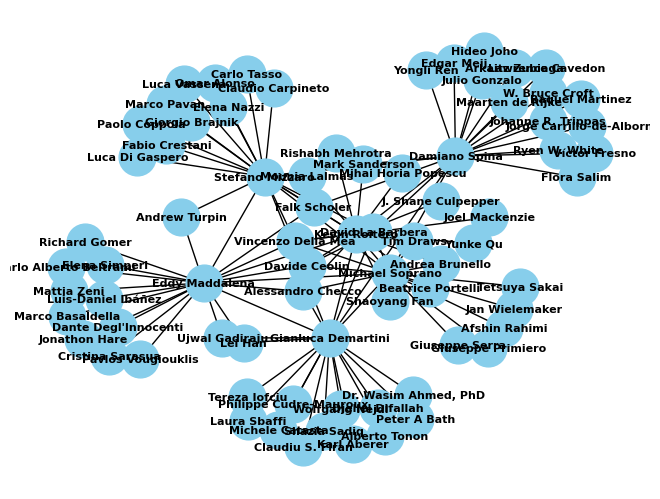

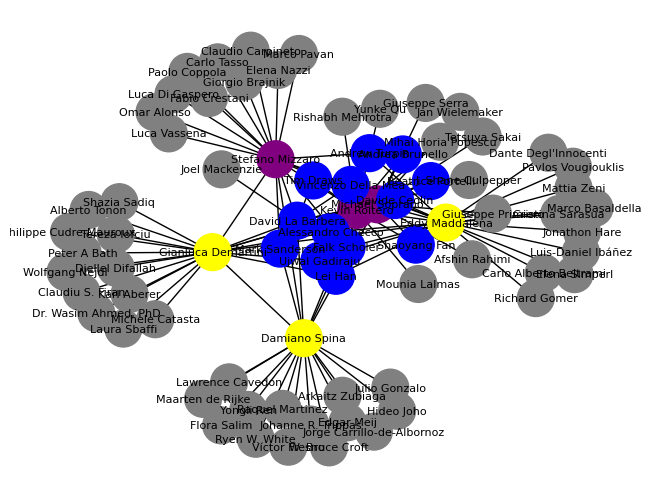

<Figure size 640x480 with 0 Axes>

In [3]:
df_nodes = pd.read_csv("data/nodes.csv")
#print(df_nodes)
df_edges = pd.read_csv("data/edges.csv")
#print(df_edges)


# 3. Utilizzando i due DataFrame prodotti:
# a. Generare un grafo indiretto che ne rappresenta le informazioni contenute.
# Salvare (serializzare) il grafo in locale nella cartella /graphs .
# b. Visualizzare il grafo prodotto colorando i nodi a seconda del loro grado con le
# seguenti colorazioni: grigio per nodi con grado uguale a 1, blu per nodi con
# grado compreso tra 2 e 10, viola per nodi con grado compreso tra 11 e 20,
# giallo per nodi con grado maggiore di 20. Inoltre, per ciascun nodo
# visualizzare il nome dell’autore. Salvare la visualizzazione nella cartella
# /visualizations.

# Crea un grafo indiretto da DataFrame dei nodi e degli archi
grafo = nx.from_pandas_edgelist(df_edges, 'author1', 'author2', create_using=nx.Graph())

print(df_nodes)
# Aggiunta dei nodi
for i, row in df_nodes.iterrows():
    grafo.add_node(row['name'], name=row['name'], affiliations=row['affiliations'], author_id=row['author_id'], cited_by=row['cited_by'], interests=row['interests'])

# Visualizzazione del grafo
pos = nx.spring_layout(grafo)  # Posizione dei nodi
nx.draw(grafo, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
plt.show()


# write_gpickle()
with open("graphs/coauthorship_graph.pkl", 'wb') as f:
    pickle.dump(grafo, f)



# read_gpickle()
#with open("graphs/grafo.pkl", 'rb') as f:  # notice the r instead of w
#    game_of_graphs = pickle.load(f)


# Calcolo del grado di ciascun nodo
node_degrees = dict(grafo.degree())

# Definizione delle colorazioni in base al grado
node_colors = []
for node, degree in node_degrees.items():
    if degree == 1:
        node_colors.append('gray')
    elif 2 <= degree <= 10:
        node_colors.append('blue')
    elif 11 <= degree <= 20:
        node_colors.append('purple')
    else:
        node_colors.append('yellow')

# Estrazione delle etichette degli autori
#node_labels = nx.get_node_attributes(grafo, 'name')
#print(node_labels)


# Disegno del grafo
pos = nx.spring_layout(grafo)  # Puoi cambiare l'algoritmo di layout se preferisci
nx.draw(grafo, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=8)

# Aggiunta delle etichette degli autori
#nx.draw_networkx_labels(grafo, pos, labels=node_labels, font_color='black')

# Visualizzazione del grafo
plt.show()

plt.savefig("visualizations/first_graph.pdf")